In [1]:
#importing packages
import pandas as pd
import numpy as np

In [2]:
# Importing the dataset
nb = pd.read_csv('../Datasets/NB.csv')
nb['Fault'] = 0

outer = pd.read_csv('../Datasets/OR - 21.csv')
outer['Fault'] = 1

In [3]:
dataset = nb.append(outer)
dataset

C:\Users\loaia\AppData\Local\Temp\ipykernel_13284\1640988918.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = nb.append(outer)


,DE,FE,Fault
0,0.064254,0.038625,0
1,0.063002,0.096769,0
2,-0.004381,0.127382,0
3,-0.035882,0.144640,0
4,-0.023991,0.086702,0
...,...,...,...
121150,-0.132385,0.046844,1
121151,-0.060507,0.001027,1
121152,0.139694,0.126149,1
121153,0.086091,0.049104,1


In [4]:
X = dataset.iloc[:, 0:2].values
y = dataset.iloc[:, 2]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [8]:
classifier = Sequential()

In [9]:
classifier.add(Dense(units = 25, kernel_initializer = 'uniform', activation = 'relu', input_dim = 2))

In [10]:
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))

In [11]:
classifier.add(Dense(units= 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [12]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                75        
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________


In [13]:
model = classifier.fit(X_train, y_train, batch_size = 1000, epochs = 100, shuffle = False)


Epoch 1/100
194/194 [==============================] - 1s 2ms/step - loss: 0.6336 - accuracy: 0.6911
Epoch 2/100
194/194 [==============================] - 0s 2ms/step - loss: 0.4973 - accuracy: 0.7553
Epoch 3/100
194/194 [==============================] - 0s 2ms/step - loss: 0.4785 - accuracy: 0.7600
Epoch 4/100
194/194 [==============================] - 0s 2ms/step - loss: 0.4758 - accuracy: 0.7611
Epoch 5/100
194/194 [==============================] - 0s 2ms/step - loss: 0.4747 - accuracy: 0.7613
Epoch 6/100
194/194 [==============================] - 0s 2ms/step - loss: 0.4742 - accuracy: 0.7614
Epoch 7/100
194/194 [==============================] - 0s 2ms/step - loss: 0.4738 - accuracy: 0.7616
Epoch 8/100
194/194 [==============================] - 0s 2ms/step - loss: 0.4735 - accuracy: 0.7618
Epoch 9/100
194/194 [==============================] - 0s 2ms/step - loss: 0.4733 - accuracy: 0.7619
Epoch 10/100
194/194 [==============================] - 0s 2ms/step - loss: 0.4732 - accura

194/194 [==============================] - 0s 2ms/step - loss: 0.4723 - accuracy: 0.7622
Epoch 82/100
194/194 [==============================] - 0s 2ms/step - loss: 0.4723 - accuracy: 0.7622
Epoch 83/100
194/194 [==============================] - 0s 2ms/step - loss: 0.4723 - accuracy: 0.7622
Epoch 84/100
194/194 [==============================] - 0s 2ms/step - loss: 0.4723 - accuracy: 0.7622
Epoch 85/100
194/194 [==============================] - 0s 2ms/step - loss: 0.4723 - accuracy: 0.7623
Epoch 86/100
194/194 [==============================] - 0s 2ms/step - loss: 0.4723 - accuracy: 0.7623
Epoch 87/100
194/194 [==============================] - 0s 2ms/step - loss: 0.4723 - accuracy: 0.7623
Epoch 88/100
194/194 [==============================] - 0s 2ms/step - loss: 0.4723 - accuracy: 0.7623
Epoch 89/100
194/194 [==============================] - 0s 2ms/step - loss: 0.4723 - accuracy: 0.7622
Epoch 90/100
194/194 [==============================] - 0s 2ms/step - loss: 0.4723 - accuracy: 

In [14]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

1515/1515 [==============================] - 2s 901us/step


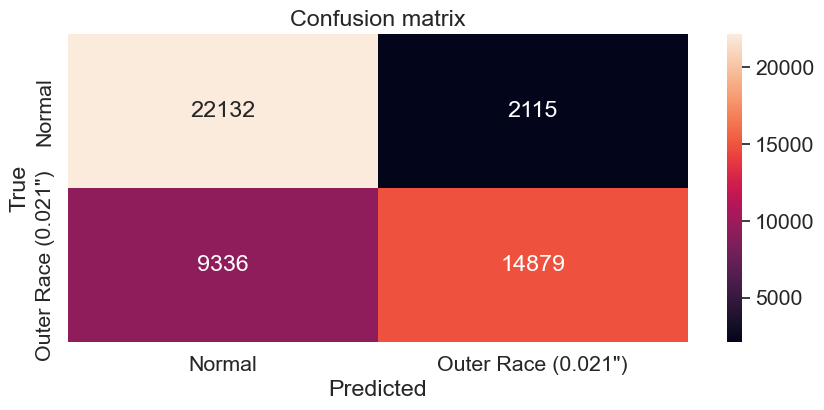

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

index = ['Normal', 'Outer Race (0.021")']  
columns = ['Normal', 'Outer Race (0.021")']  
cm_df = pd.DataFrame(cm,columns,index)  


plt.figure(figsize=(10,4))
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm_df, annot=True, fmt='g') # font size
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

plt.show()

In [16]:
classifier.evaluate(X_test, y_test)

1515/1515 [==============================] - 2s 1ms/step - loss: 0.4706 - accuracy: 0.7637


[0.4705744683742523, 0.7637117505073547]

In [17]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred, target_names=['Normal', 'Outer Race (0.021")'])
print(cr)

                     precision    recall  f1-score   support

             Normal       0.70      0.91      0.79     24247
Outer Race (0.021")       0.88      0.61      0.72     24215

           accuracy                           0.76     48462
          macro avg       0.79      0.76      0.76     48462
       weighted avg       0.79      0.76      0.76     48462



In [18]:
normal, OR = cm
anomalies = normal[1] + OR[0]
print("Anomalies: {}".format(anomalies))

Anomalies: 11451
